# Protein Exploration Notebook

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind


# Load Datasets

In [2]:
#Load Datasets

protein_df = pd.read_csv('../data/raw/ProteinAndPathologyQuantifications.csv')
Donor_df = pd.read_csv('../data/raw/DonorInformation.csv')
Stains_df = pd.read_csv('../data/raw/DescriptionOfStains.csv')
gene_expression_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_normalized.csv')
gene_expression_unnormalized_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/fpkm_table_unnormalized.csv')
columns_samples_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/columns-samples.csv')
rows_genes_df = pd.read_csv('../data/raw/gene_expression_matrix_2016-03-03/rows-genes.csv')



In [3]:
# Create df of donors ids and corresponding diagnosis, this will be used to map to the proteins data samples
donor_labels_df = Donor_df[['donor_id','act_demented']]

In [4]:
#donor_labels_df

In [5]:
# Map donor_labels_df to protein_df so each sample will be associated with the appropriate diagnosis 
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df['dementia_status'] = protein_df['donor_id'].map(donor_labels_dict)

In [6]:
#Examine protein_df to ensure labels properly populated
#protein_df

In [7]:
#Check the distribution of Dementia in Protein samples dataset
print('No Dementia: ', len(protein_df[protein_df['dementia_status']=='No Dementia']))
print('Dementia: ', len(protein_df[protein_df['dementia_status']=='Dementia']))

No Dementia:  197
Dementia:  180


# Handling Missing Data

In [8]:
#check for Nan
total_nan_count = protein_df.isna().sum()


In [9]:
#total_nan_count

In [10]:
# Process dataframe by Dropping Nan
# - drop isoprostane_pg_per_mg because missing most of the data (63% of samples missing isoprostane data)
# - dropna for remaining columns (will still represent >70% of the samples)

protein_df_drop_cleaned = protein_df.drop('isoprostane_pg_per_mg',axis=1)
protein_df_drop_cleaned.dropna(inplace = True)

In [11]:
# Check for Nan after cleaning
total_nan_count = protein_df_drop_cleaned.isna().sum()
#total_nan_count

In [12]:
# protein_df_drop_cleaned has samples with corresponding dementia labels and no missing values. 
# Represents total of 279 samples from original 377 samples (74%)
protein_df_drop_cleaned

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [13]:
# Protein groups
# There are 28 different protein measures, however there are only 14 distinct proteins. 
# Some measures are different methods of measuring the same protein, for example ihc_a_syn is measuring the 
# stain area coverage for α-synuclein, while a_syn_pg_per_mg is measuring the concentration of a_syn_pg_per_mg

# Amyloid: ihc_a_beta, ab42_over_ab40_ratio, ihc_a_beta_ffpe, ab42_pg_per_mg, ab40_pg_per_mg
# α-synuclein:ihc_a_syn, a_syn_pg_per_mg
# interferon: ifn_g_pg_per_mg
# RANTES: rantes_pg_per_mg
# Tau: ihc_tau2_ffpe, ptau_over_tau_ratio, ptau_ng_per_mg, ihc_at8, ihc_at8_ffpe, tau_ng_per_mg
# Isoprostane: isoprostane_pg_per_mg
# BDNF: bdnf_pg_per_mg
# MIP-1a: mip_1a_pg_per_mg
# Interleukins: il_4_pg_per_mg, il_1b_pg_per_mg, il_7_pg_per_mg, il_6_pg_per_mg, il_10_pg_per_mg
# MCP-1: mcp_1_pg_per_mg
# IBA-1: ihc_iba1_ffpe
# phospho-TDP43: ihc_ptdp_43_ffpe
# GFAP:ihc_gfap_ffpe
# TNF: Tumor Necrosis Factor alpha

In [14]:
#View list of columns
columns = protein_df_drop_cleaned.columns
columns

Index(['donor_id', 'donor_name', 'structure_id', 'structure_acronym',
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg', 'dementia_status'],
      dtype='object')

In [15]:
# columns to keep for training
# dropping catergorical columns as well as donor_id/donor_name and dementia status

columns_keep_for_training = [
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg']

In [17]:
protein_df = protein_df_drop_cleaned.drop(columns=['donor_name','structure_id','structure_acronym'])

In [18]:
protein_df[columns_keep_for_training] = StandardScaler().fit_transform(protein_df[columns_keep_for_training])

In [19]:
#protein_df

In [20]:
# Explore differentially expressed proteins

dementia_df = protein_df[protein_df['dementia_status'] == 'Dementia']
no_dementia_df = protein_df[protein_df['dementia_status'] == 'No Dementia']

def calculate_differential_expression(protein):
    dementia_values = dementia_df[protein].values
    no_dementia_values = no_dementia_df[protein].values

    t_stat, p_value = ttest_ind(dementia_values, no_dementia_values)
    
    return p_value

p_values_df = pd.DataFrame(index=['P-Value'])

for protein in protein_df.columns[1:-1]:  
    p_value = calculate_differential_expression(protein)
    p_values_df[protein] = p_value

p_values_df = p_values_df.T.rename(columns={'P-Value': 'P-Value'})

significance_threshold = 0.5
differentially_expressed_proteins = p_values_df[p_values_df['P-Value'] < significance_threshold]

print("Differentially Expressed Proteins:")
print(differentially_expressed_proteins)


Differentially Expressed Proteins:
                           P-Value
ihc_a_syn             2.668535e-01
ihc_tau2_ffpe         8.811193e-07
ihc_at8_ffpe          2.828903e-07
ihc_at8               9.458078e-08
ihc_ptdp_43_ffpe      1.525641e-01
ihc_a_beta_ffpe       3.989251e-02
ihc_a_beta            1.884544e-03
ihc_gfap_ffpe         3.374644e-03
ptau_ng_per_mg        2.494403e-03
ab42_over_ab40_ratio  4.759910e-02
tau_ng_per_mg         3.087650e-02
il_1b_pg_per_mg       3.808798e-01
ptau_over_tau_ratio   3.887665e-04
rantes_pg_per_mg      4.608042e-01
a_syn_pg_per_mg       2.941418e-01
mcp_1_pg_per_mg       5.875452e-02
bdnf_pg_per_mg        3.385544e-01
il_7_pg_per_mg        1.718641e-01
ab42_pg_per_mg        2.534198e-02


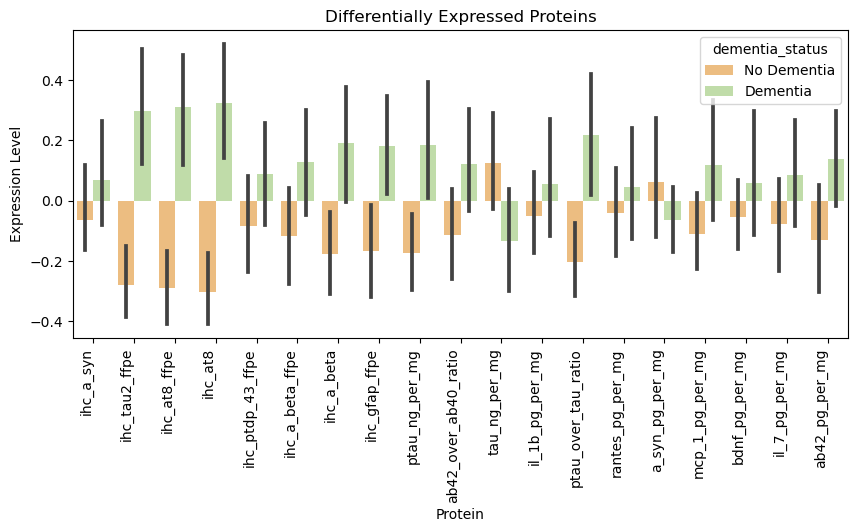

In [21]:
#Plot the differentially expressed proteins

significant_proteins = differentially_expressed_proteins.index.tolist()
#print(significant_proteins)

significant_proteins_df = protein_df[['dementia_status'] + significant_proteins]
#print(significant_proteins_df)

melted_df = pd.melt(significant_proteins_df, id_vars='dementia_status', var_name='Protein', value_name='Expression')

plt.figure(figsize=(10, 4))
sns.barplot(x='Protein', y='Expression', hue='dementia_status', data=melted_df, palette='Spectral')
plt.title('Differentially Expressed Proteins')
plt.xlabel('Protein')
plt.ylabel('Expression Level')
plt.xticks(rotation=90, ha='right')
plt.legend(title='dementia_status')
plt.show()